In [12]:
! ls ../training/grambow_rapter_122623/

rapter_hydro_test.csv  test_preds_reaction_full.csv
rapter_mg_test.csv     test_preds_reaction_hydro.csv
rapter_test.csv        test_preds_reaction_mg.csv


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset_dicts = {
    "test_full": "rapter_test.csv",
    "test_mg": "rapter_mg_test.csv",
    "test_hydro": "rapter_hydro_test.csv",
    "pred_full": "test_preds_reaction_full.csv",
    "pred_mg": "test_preds_reaction_mg.csv",
    "pred_hydro": "test_preds_reaction_hydro.csv",
}

for k, v in dataset_dicts.items():
    dataset_dicts[k] = pd.read_csv("../training/grambow_rapter_122623/" + v)



In [58]:
print("-"*80)
for split in ["full", "mg", "hydro"]:
    preds = dataset_dicts["pred_" + split]["ea"]
    test = dataset_dicts["test_" + split]["ea"]
    print(split)
    print("R2: ", preds.corr(test))
    print("MAE:", (preds - test).abs().mean())
    print("RMSE:", ((preds - test).abs()**2).mean()**0.5)
    print("-"*80)


--------------------------------------------------------------------------------
full
R2:  0.8547467955377466
MAE: 0.27678014009776414
RMSE: 0.6516023486818537
--------------------------------------------------------------------------------
mg
R2:  0.8282057266500382
MAE: 0.30753674651248447
RMSE: 0.7149149086943808
--------------------------------------------------------------------------------
hydro
R2:  0.8282057266500382
MAE: 0.30753674651248447
RMSE: 0.7149149086943808
--------------------------------------------------------------------------------


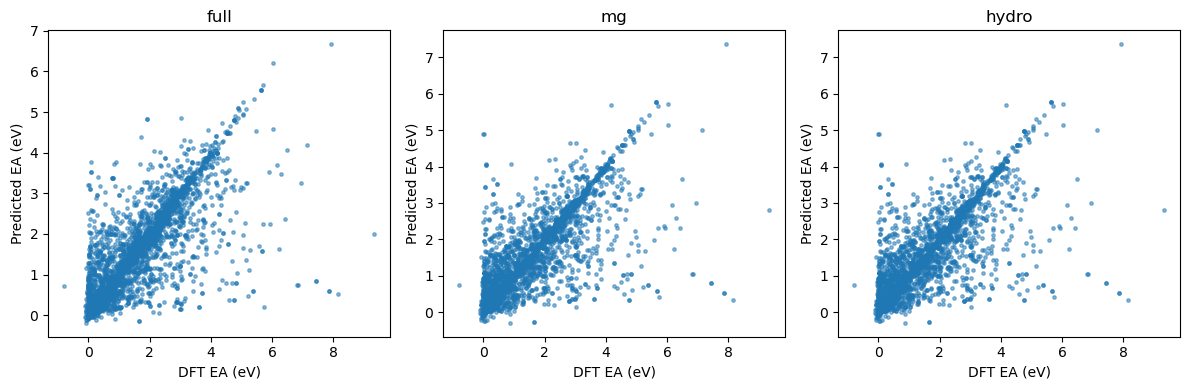

In [56]:
# plot in side-by-side scatter plots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, split in enumerate(["full", "mg", "hydro"]):
    preds = dataset_dicts["pred_" + split]["ea"]
    test = dataset_dicts["test_" + split]["ea"]
    ax[i].scatter(test, preds, alpha=0.5, s = 6)
    ax[i].set_xlabel("DFT EA (eV)")
    ax[i].set_ylabel("Predicted EA (eV)")
    ax[i].set_title(split)

plt.tight_layout()